# Mini Batch Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [2]:
#Create dataset
X,y = make_regression(n_samples=10000,n_features=20, n_informative=20, noise=10,random_state=1)

#Normalistion
u = np.mean(X,axis=0)
std = np.std(X, axis=0)
X = (X-u)/std

In [3]:
#Add aa column for its vectorisation 
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [7]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):
    error = 0.0
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    e = np.sum((y-y_)**2)
    
    return e/m

def gradient(X, y, theta):
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (y_-y))
    m = X.shape[0]
    
    return grad/m

def gradient_descent(X, y, learning_rate = 0.01, max_iters = 300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X, y, theta)
        error_list.append(e)
        
        #Batch Gradient descent (calculate the gradient wrt to entire dataset)
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta, error_list

In [8]:
theta, error_list = gradient_descent(X, y)

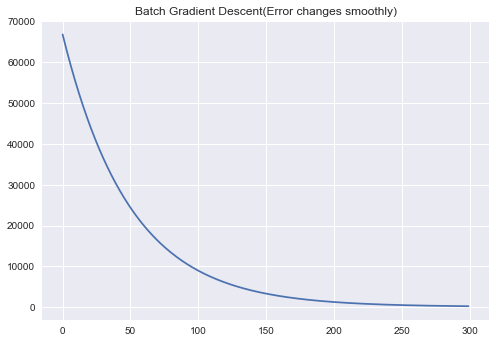

In [10]:
plt.style.use('seaborn')

plt.plot(error_list)
plt.title('Batch Gradient Descent(Error changes smoothly)')
plt.show()

In [11]:
len(error_list)

300

## Mini Batch Gradient Descent

In [45]:
def batch_gradient_descent(X, y, batch_size=200, learning_rate = 0.01, max_iters = 10):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    data = np.hstack((X, y.reshape(-1, 1)))
    
    for i in range(max_iters): 
        #Mini Batch Gradient descent (calculate the gradient wrt to batch(piece) of dataset)
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m//batch_size
        
        for i in range(total_batches):
            batch_data = data[i*batch_size : (i+1)*batch_size , :]
            x_batch = batch_data[:, :-1]
            y_batch = batch_data[:,-1]
            
            batch_gradient = gradient(x_batch, y_batch, theta)
            theta = theta - learning_rate*batch_gradient
            
            e = error(x_batch, y_batch, theta)
            error_list.append(e)                
    
    return theta, error_list

In [46]:
theta, error_list_2 = batch_gradient_descent(X, y)

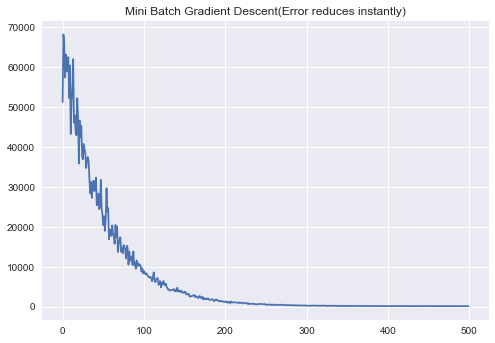

In [47]:
plt.style.use('seaborn')
plt.plot(error_list_2)
plt.title('Mini Batch Gradient Descent(Error reduces instantly)')
plt.show()

In [41]:
error_list_2[-1]

92.19267505225493

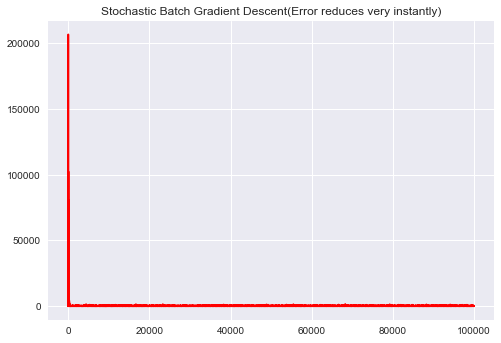

In [53]:
theta, error_list_2 = batch_gradient_descent(X, y, batch_size=1)
plt.style.use('seaborn')
plt.plot(error_list_2, color='red', label = "Batch size=1")
plt.title('Stochastic Batch Gradient Descent(Error reduces very instantly)')
plt.show()

In [54]:
error_list_2[-1]

5.851092606510628